# Generieren von Feature-Stacks
Maschinelle Lernalgorithmen wie Random Forest Classifier, z.B. wie in [APOC](https://github.com/haesleinhuepf/apoc) implementiert, verwenden Feature-Stacks für die Pixelklassifizierung. Feature-Stacks sind Listen von Bildern gleicher Größe (2D oder 3D). APOC bietet eine Hilfsfunktion zum Generieren von Feature-Stacks. Sie nimmt ein Bild und eine Feature-Spezifikationszeichenkette als Eingabe, um einen Feature-Stack zu erzeugen.

Beginnen wir damit, ein Beispielbild zu laden und eine Komfortfunktion für die Visualisierung zu erstellen:

In [1]:
from skimage.io import imread, imshow
import numpy as np
import apoc
import matplotlib.pyplot as plt

Wir beginnen wieder mit dem Beispielbild der Blobs.

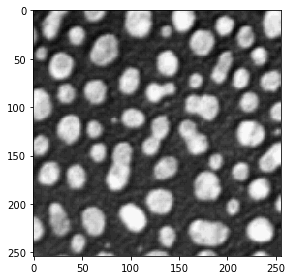

In [2]:
image = imread('../../data/blobs.tif')
imshow(image)

Wir definieren außerdem eine Hilfsfunktion zur Visualisierung von Feature-Stacks.

In [3]:
def visualize(feature_stack):
    """
    Shows lists of images in rows of three
    """
    if len(feature_stack) == 0:
        return
    
    # show feature images
    width = 3
    height = int(len(feature_stack) / 3)
    if height * width < len(feature_stack):
        height = height + 1    
    
    fig, axes = plt.subplots(height, width, figsize=(10,10))

    for i, f in enumerate(feature_stack):
        if height > 1:
            axes[int(i / 3)][i % 3].imshow(f, cmap=plt.cm.gray)
        else:
            axes[i].imshow(f, cmap=plt.cm.gray)

    w = len(feature_stack) % width
    if w > 0:
        w = width - w
        while (w > 0):
            if height > 1:
                axes[-1][width - w].set_visible(False)
            else:
                axes[width - w].set_visible(False)
            w = w - 1

    plt.show()        

## Feature-Stacks
Ein Feature-Stack ist eine Liste von 2D- oder 3D-Bildern, typischerweise abgeleitet von einem Originalbild. Wenn Sie keine Feature-Spezifikation angeben, wird ein Stack mit dem Originalbild, einer verschwommenen Version und einem Kantenbild erzeugt:

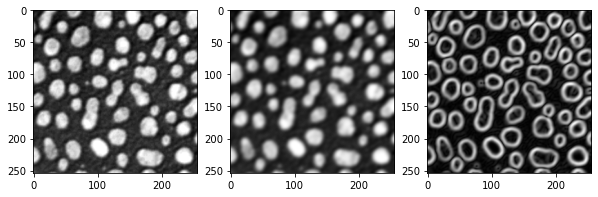

In [4]:
feature_stack = apoc.generate_feature_stack(image)

visualize(feature_stack)

Es gibt auch einige vordefinierte Feature-Sets:

PredefinedFeatureSet.custom
PredefinedFeatureSet.small_quick


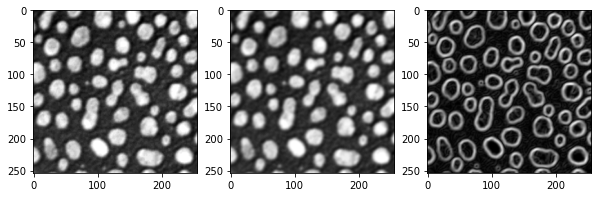

PredefinedFeatureSet.medium_quick


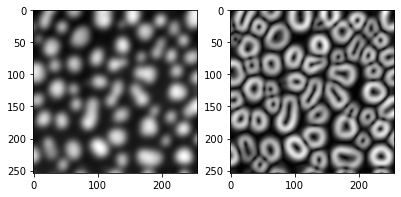

PredefinedFeatureSet.large_quick


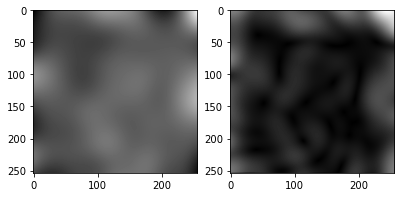

PredefinedFeatureSet.small_dog_log


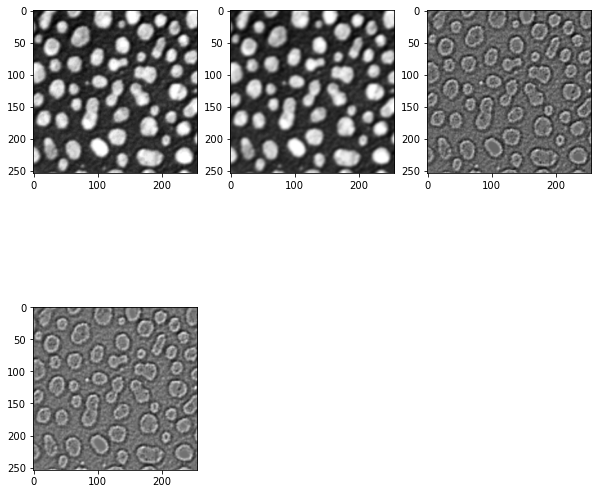

PredefinedFeatureSet.medium_dog_log


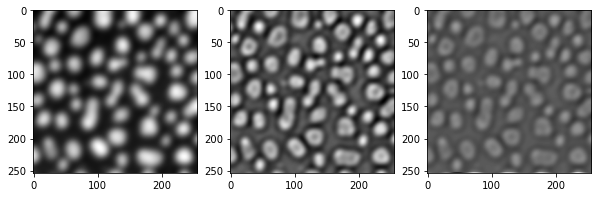

PredefinedFeatureSet.large_dog_log


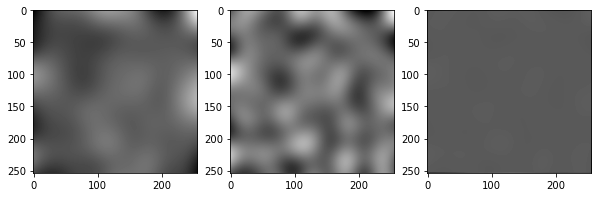

PredefinedFeatureSet.object_size_1_to_2_px


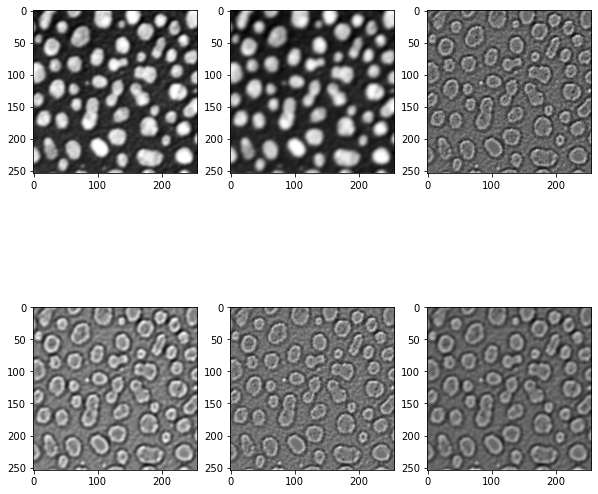

PredefinedFeatureSet.object_size_1_to_5_px


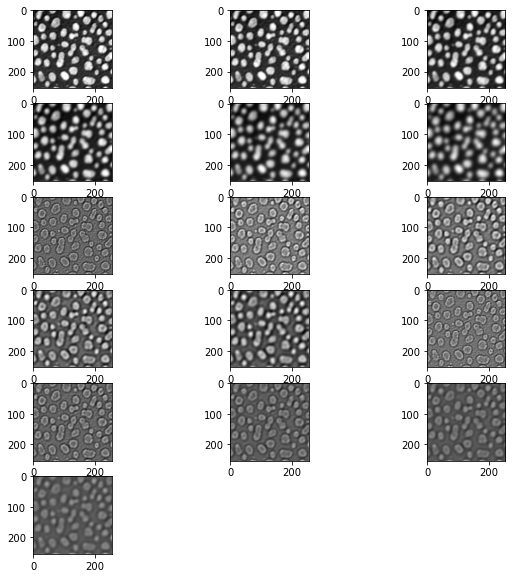

PredefinedFeatureSet.object_size_3_to_8_px


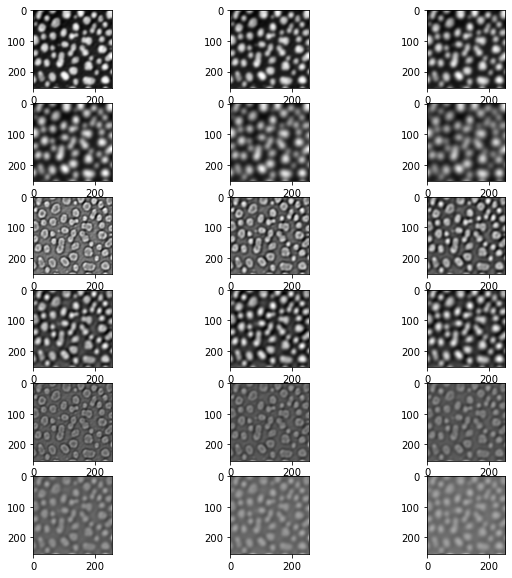

PredefinedFeatureSet.object_size_5_to_10_px


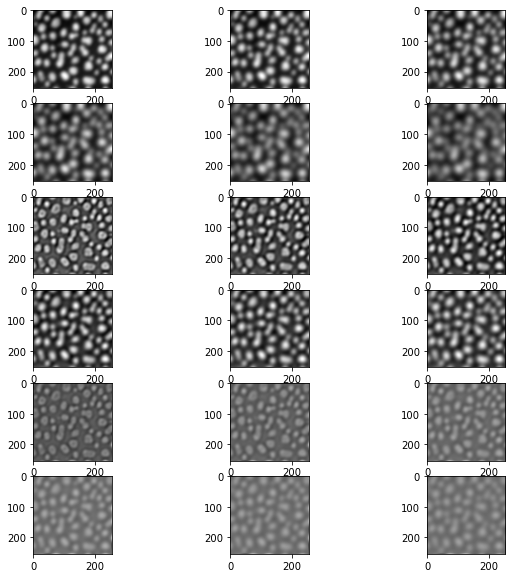

PredefinedFeatureSet.object_size_10_to_15_px


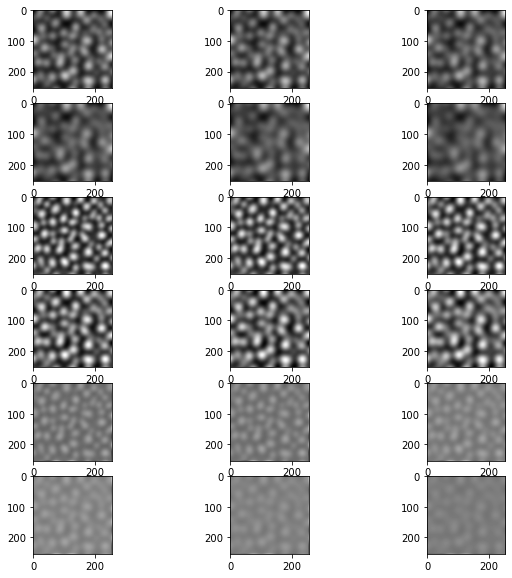

PredefinedFeatureSet.object_size_15_to_20_px


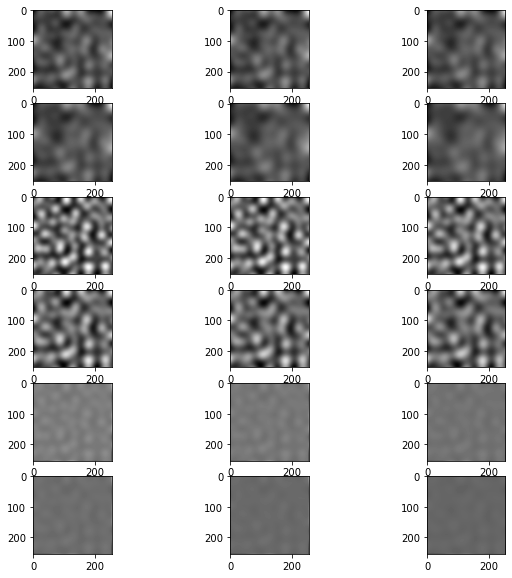

PredefinedFeatureSet.object_size_20_to_25_px


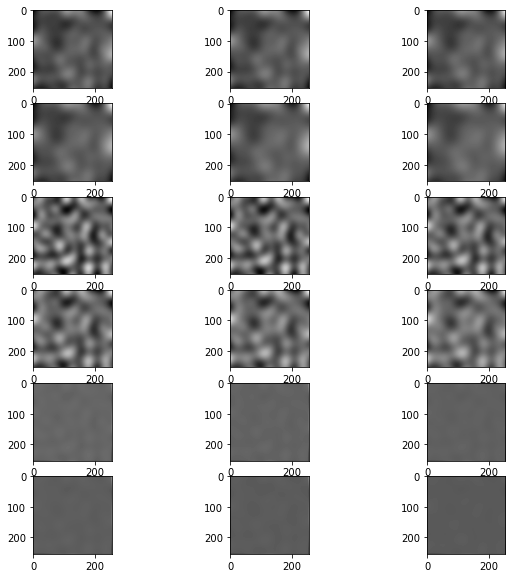

PredefinedFeatureSet.object_size_25_to_50_px


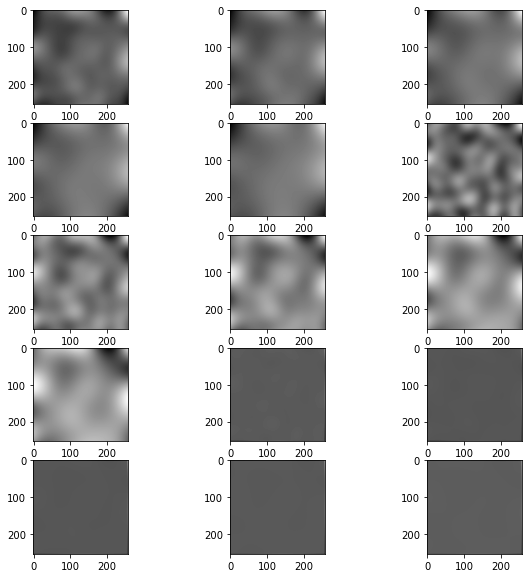

PredefinedFeatureSet.object_size_50_to_100_px


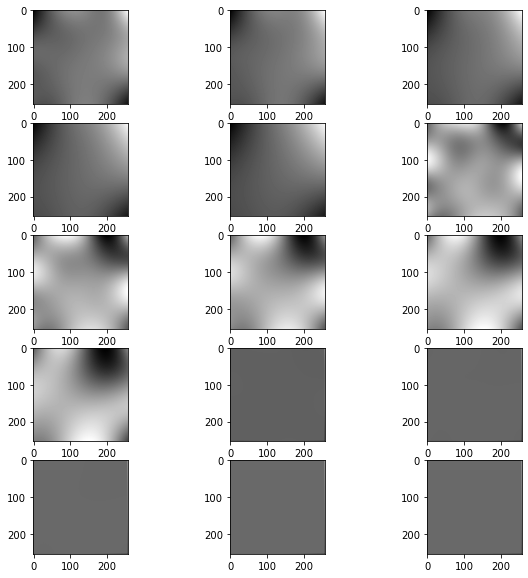

In [5]:
for f in apoc.PredefinedFeatureSet:
    print(f)
    visualize(apoc.generate_feature_stack(image, f))

## Benutzerdefinierte Feature-Definitionen
Sie können außerdem spezifische Features definieren, die [clesperanto-Filtern](https://clij.github.io/clij2-docs/reference__pyclesperanto) entsprechen:

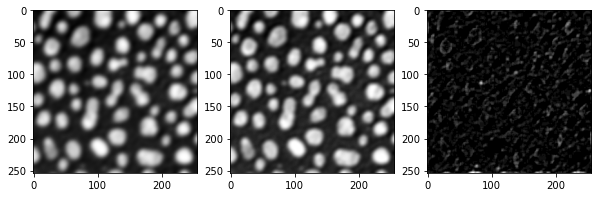

In [6]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=3 mean_box=3 top_hat_box=3")

visualize(feature_stack)

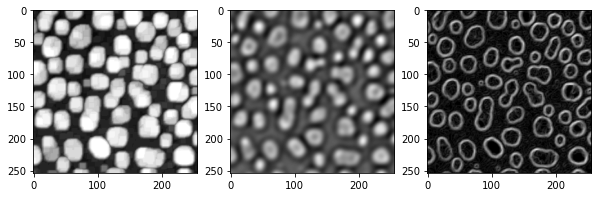

In [7]:
feature_stack = apoc.generate_feature_stack(image, "maximum_box=3 difference_of_gaussian=5 sobel=0")

visualize(feature_stack)

Sie können auch Radien / Sigmas der Features variieren:

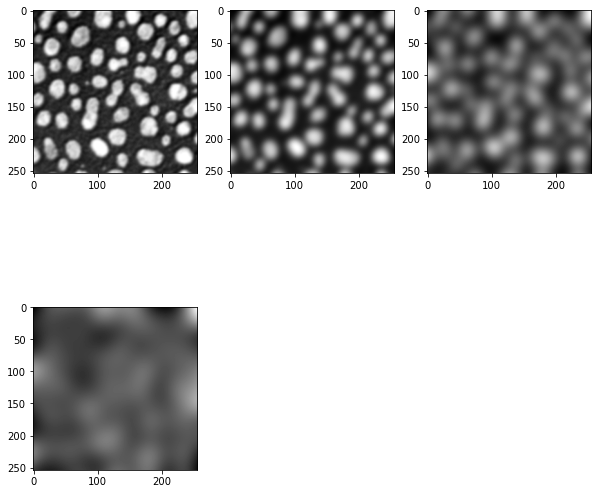

In [8]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=1 gaussian_blur=5 gaussian_blur=10 gaussian_blur=20")

visualize(feature_stack)

Darüber hinaus können einige Features kombiniert werden, zum Beispiel können Sie den Sobel eines Gaußschen Filters oder einen Laplace eines Gaußschen Filters berechnen

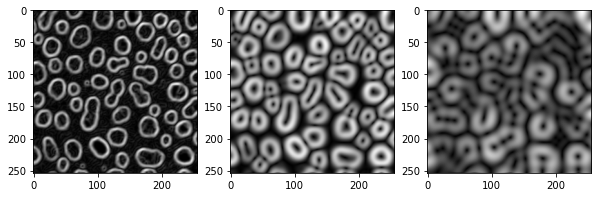

In [9]:
feature_stack = apoc.generate_feature_stack(image, "sobel_of_gaussian_blur=1 sobel_of_gaussian_blur=5 sobel_of_gaussian_blur=10")

visualize(feature_stack)

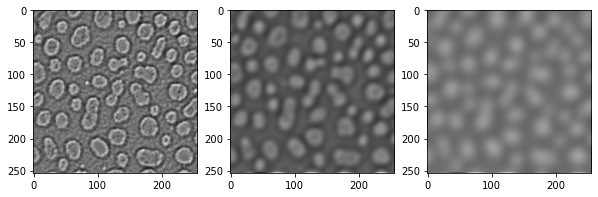

In [10]:
feature_stack = apoc.generate_feature_stack(image, "laplace_box_of_gaussian_blur=1 laplace_box_of_gaussian_blur=5 laplace_box_of_gaussian_blur=10")

visualize(feature_stack)